In [5]:
# import all EDA and Plotting Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf

# import sklearn and tensorflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
df = pd.read_csv("../ml/Churn_Modelling.csv")

In [13]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
# drop unnecessery column
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [15]:
# Apply Label Encoder for Gender
label_encoder_gender = LabelEncoder()
df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])

In [16]:
# Let's apply Label encoder for Geography
one_hot_encoder_geography = OneHotEncoder()
geo_encoder = one_hot_encoder_geography.fit_transform(df[['Geography']]).toarray()

In [17]:
geo_column = one_hot_encoder_geography.get_feature_names_out(['Geography'])

# lets create dataframe
geo_df = pd.DataFrame(geo_encoder, columns=geo_column)

df.drop(['Geography'], axis=1, inplace=True)

df = pd.concat([df, geo_df], axis=1)

df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [18]:

# Save LabelEncoder file
with open("label_encoder_gender.pkl", 'wb') as file:
  pickle.dump(label_encoder_gender, file)

# Save OneHotEncoder file
with open("one_hot_encoder_geography.pkl", 'wb') as file:
  pickle.dump(one_hot_encoder_geography, file)

In [19]:
# Create X and y
X = df.drop('Exited', axis=1)
y = df['Exited']

# split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


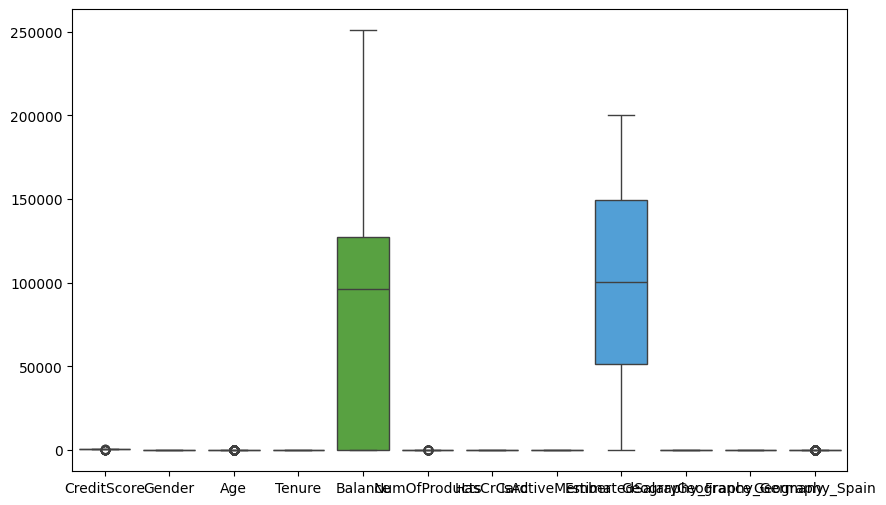

In [20]:
# before apply standardScaler
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train)
plt.show()

In [21]:
# Apply StandaredScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Save scaler file
with open("scaler.pkl", 'wb') as file:
  pickle.dump(scaler, file)

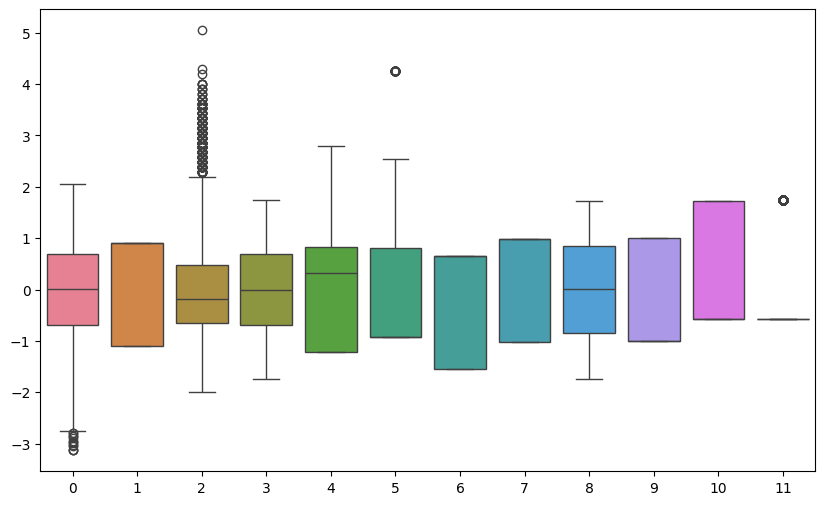

In [22]:
# after apply standardScaler
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train)
plt.show()

### ANN Implementation

In [23]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Hidden Layer 1
    Dense(32, activation='relu'), # hidden layer 2
    Dense(1, activation='sigmoid') # This is output layer
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile The Model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [26]:
## Set up Early Stopping
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)


In [46]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test,y_test),
    epochs=100,
    callbacks=[early_stopping_callback]
)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3196 - accuracy: 0.8681 - val_loss: 0.3368 - val_accuracy: 0.8660
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8671 - val_loss: 0.3349 - val_accuracy: 0.8650
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.8683 - val_loss: 0.3381 - val_accuracy: 0.8630
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3149 - accuracy: 0.8681 - val_loss: 0.3393 - val_accuracy: 0.8660
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8679 - val_loss: 0.3408 - val_accuracy: 0.8650
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8683 - val_loss: 0.3372 - val_accuracy: 0.8590
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8715 - val_loss: 0.3413 - val_accuracy: 0.8595

In [28]:
# save the model
model.save("model.h5")

d:\machine-learning\deep-learning-project\churn modelling\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
test_loss, test_acc  = model.evaluate(X_test, y_test)
print(test_acc)
print(test_loss)

63/63 [==============================] - 0s 1ms/step - loss: 0.3354 - accuracy: 0.8635
0.8634999990463257
0.33537113666534424


63/63 [==============================] - 0s 1ms/step


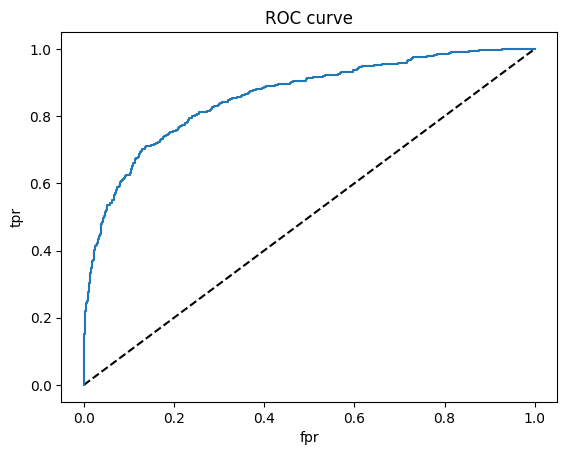

In [51]:
from sklearn.metrics import roc_curve
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [47]:
model.history.history['loss']

[0.31964877247810364,
 0.3179464042186737,
 0.3173946738243103,
 0.31494131684303284,
 0.31477901339530945,
 0.31342044472694397,
 0.3122022747993469,
 0.31129106879234314,
 0.31139901280403137,
 0.3091577887535095,
 0.306439608335495,
 0.3068982660770416]

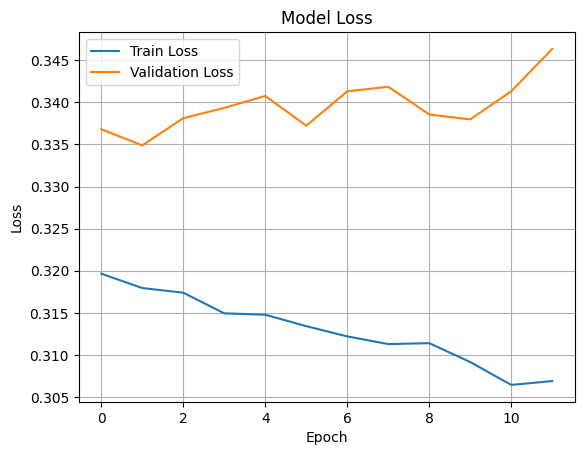

In [48]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


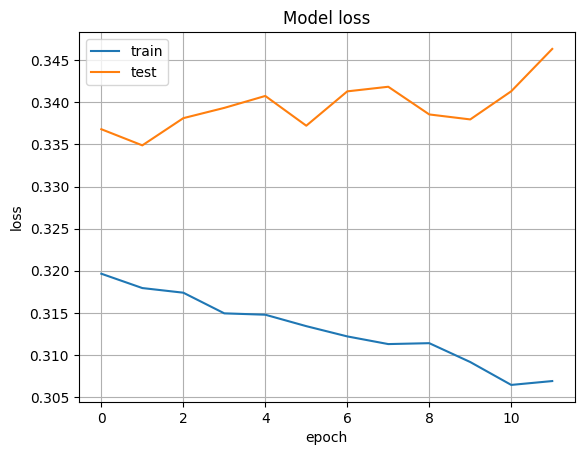

In [49]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()